In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('AirPassengers.csv')

In [3]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df['Month']=pd.to_datetime(df['Month'])
df=df.set_index(['Month'])

In [5]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


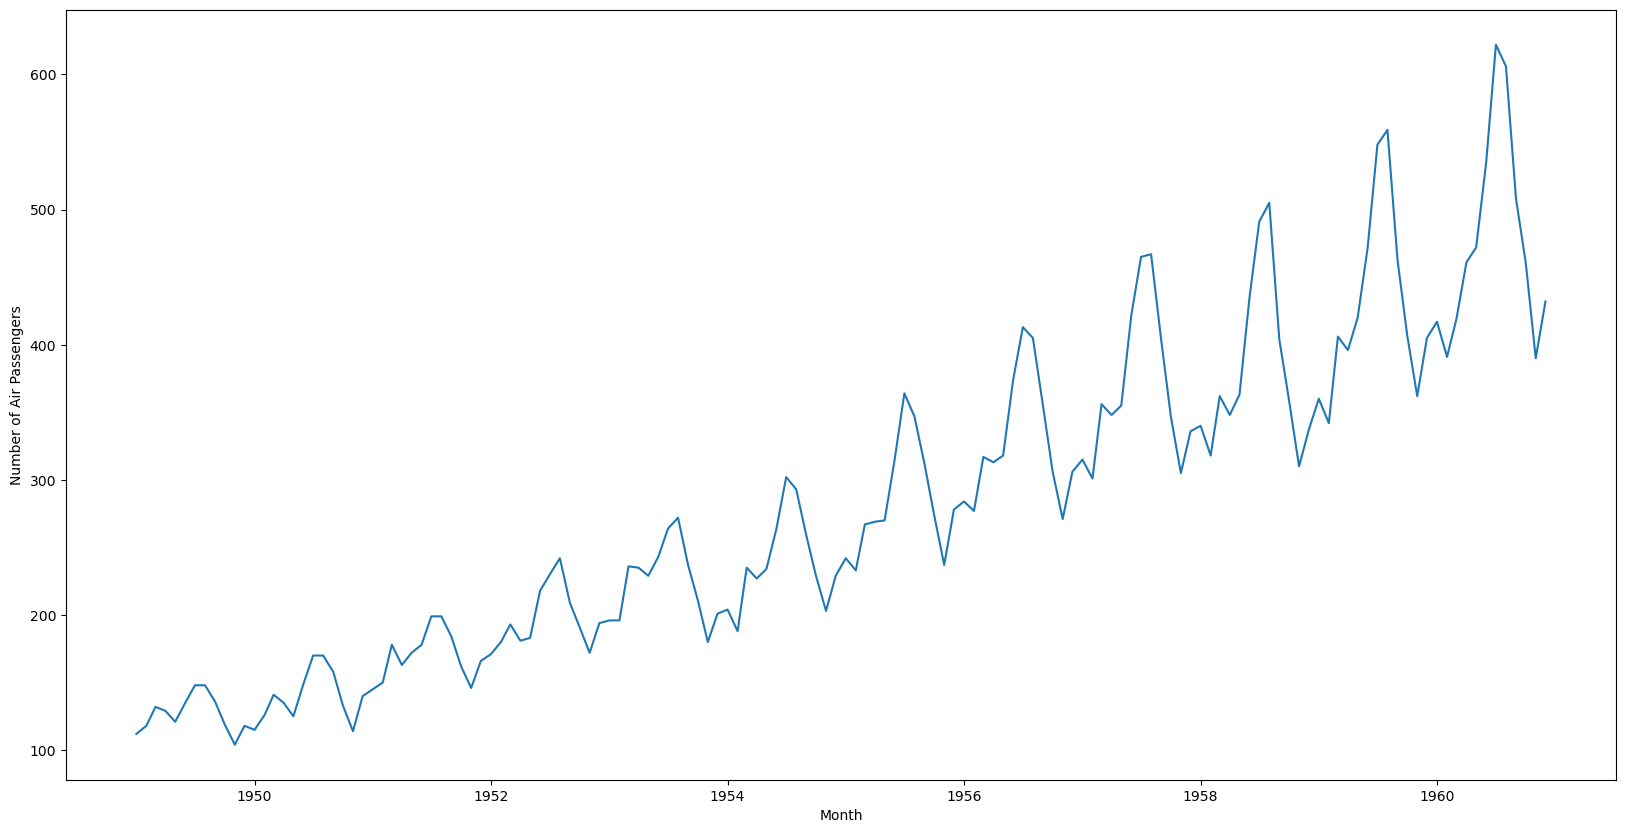

In [7]:
plt.figure(figsize=(20,10))
plt.xlabel("Month")
plt.ylabel("Number of Air Passengers")
plt.plot(df)

as we know, a stationary timeseries is one which characteristics like mean and variance does not change over time

preparing the data for analyzing the rolling mean and standard deviation to check stationarity for given time series

### Rolling Statistics

In [10]:
rolmean=df.rolling(window=12).mean()
rolstd=df.rolling(window=12).std()
print(rolmean.head(15))
print(rolstd.head(15))

            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01  126.666667
1950-01-01  126.916667
1950-02-01  127.583333
1950-03-01  128.333333
            Passengers
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   13.720147
1950-01-01   13.453342
1950-02-01   13.166475
1950-03-01   13.686977


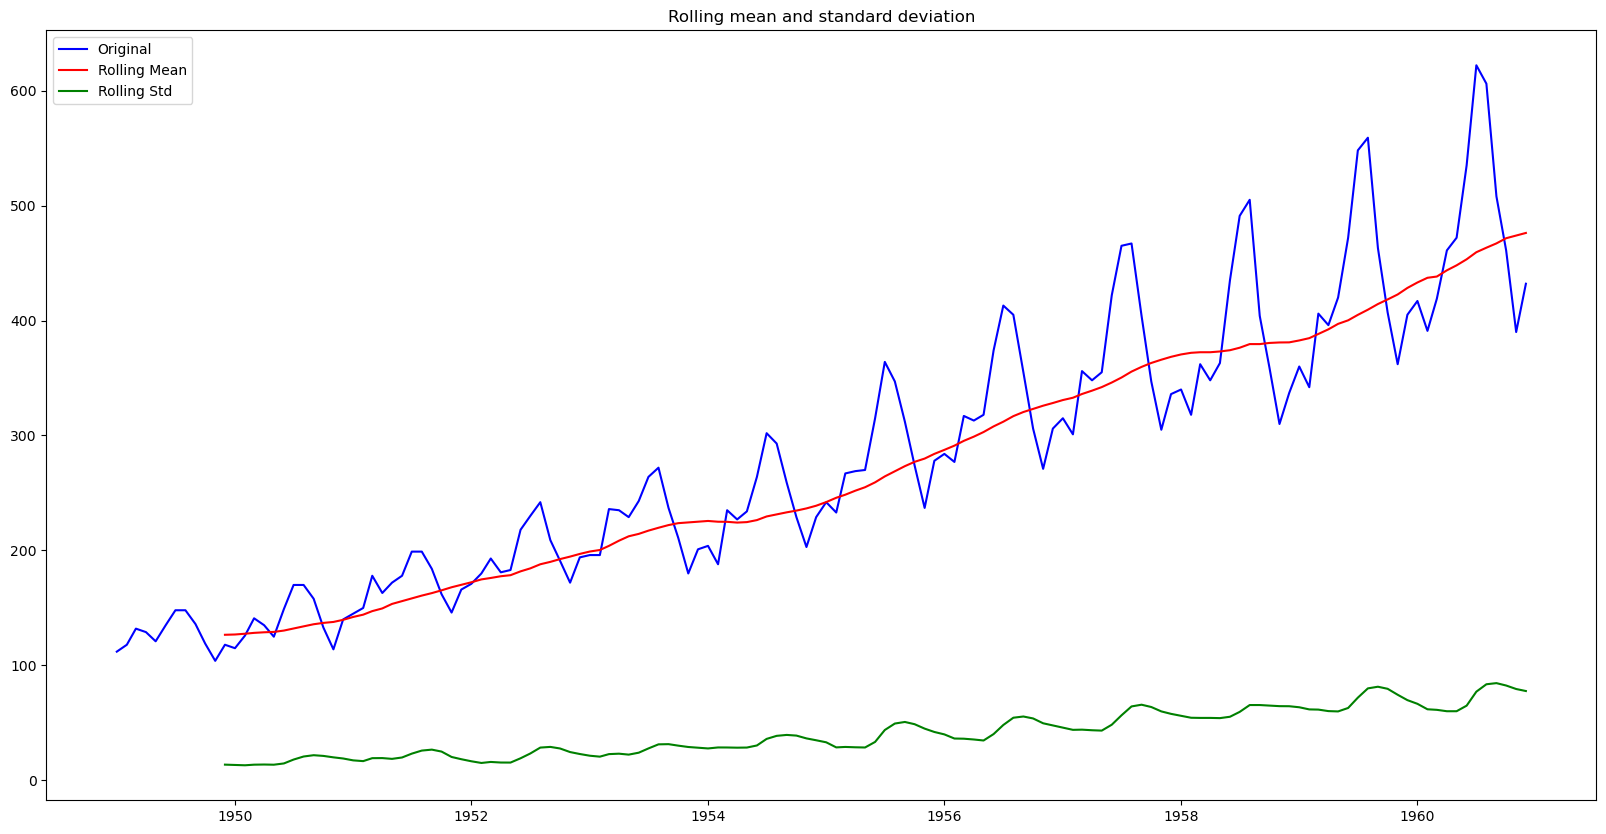

In [11]:
plt.figure(figsize=(20,10))
orig = plt.plot(df,color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling mean and standard deviation')
plt.show()

Using ADF (Augmented Dickey-Fuller Test) to check stationarity, another approach based on statistics.

ADF has : Null hypothesis - Time Series is non-stationary

### Dickey-Fuller test

In [14]:
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test:')
dftest = adfuller(df['Passengers'], autolag='AIC')

# Correcting the code by using a list to specify the index
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value

print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


From above ADF test, we fail to reject the null hypothesis, since p-value is greater than 0.05

Below we took log transformation to make our Time series stationary and plotted visual for it

We found graph upward trending over time with seasonality 

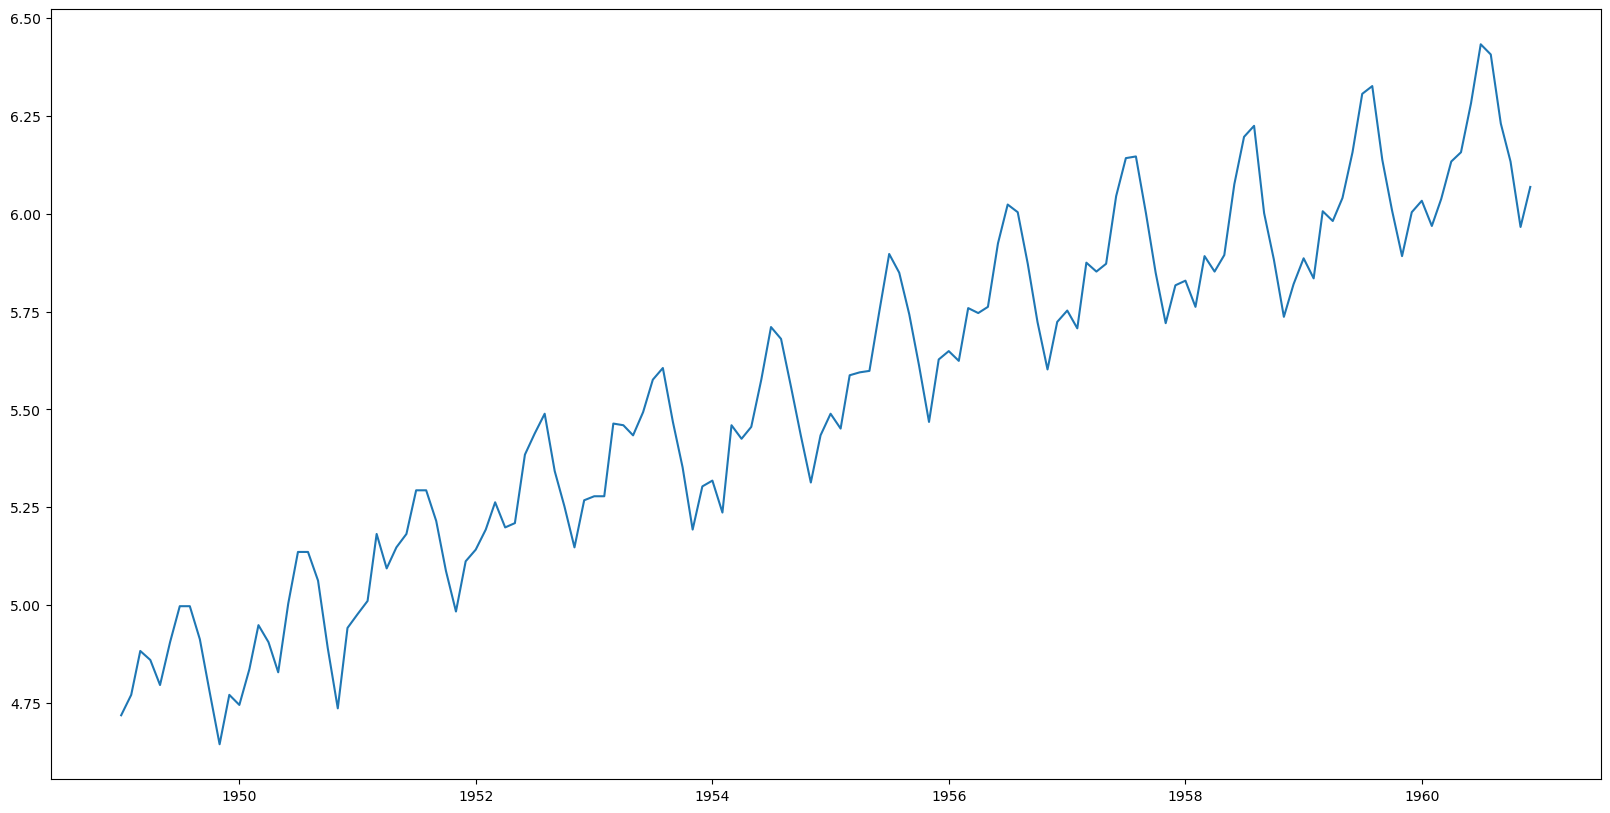

In [16]:
plt.figure(figsize=(20,10))
data_log=np.log(df)
plt.plot(data_log)

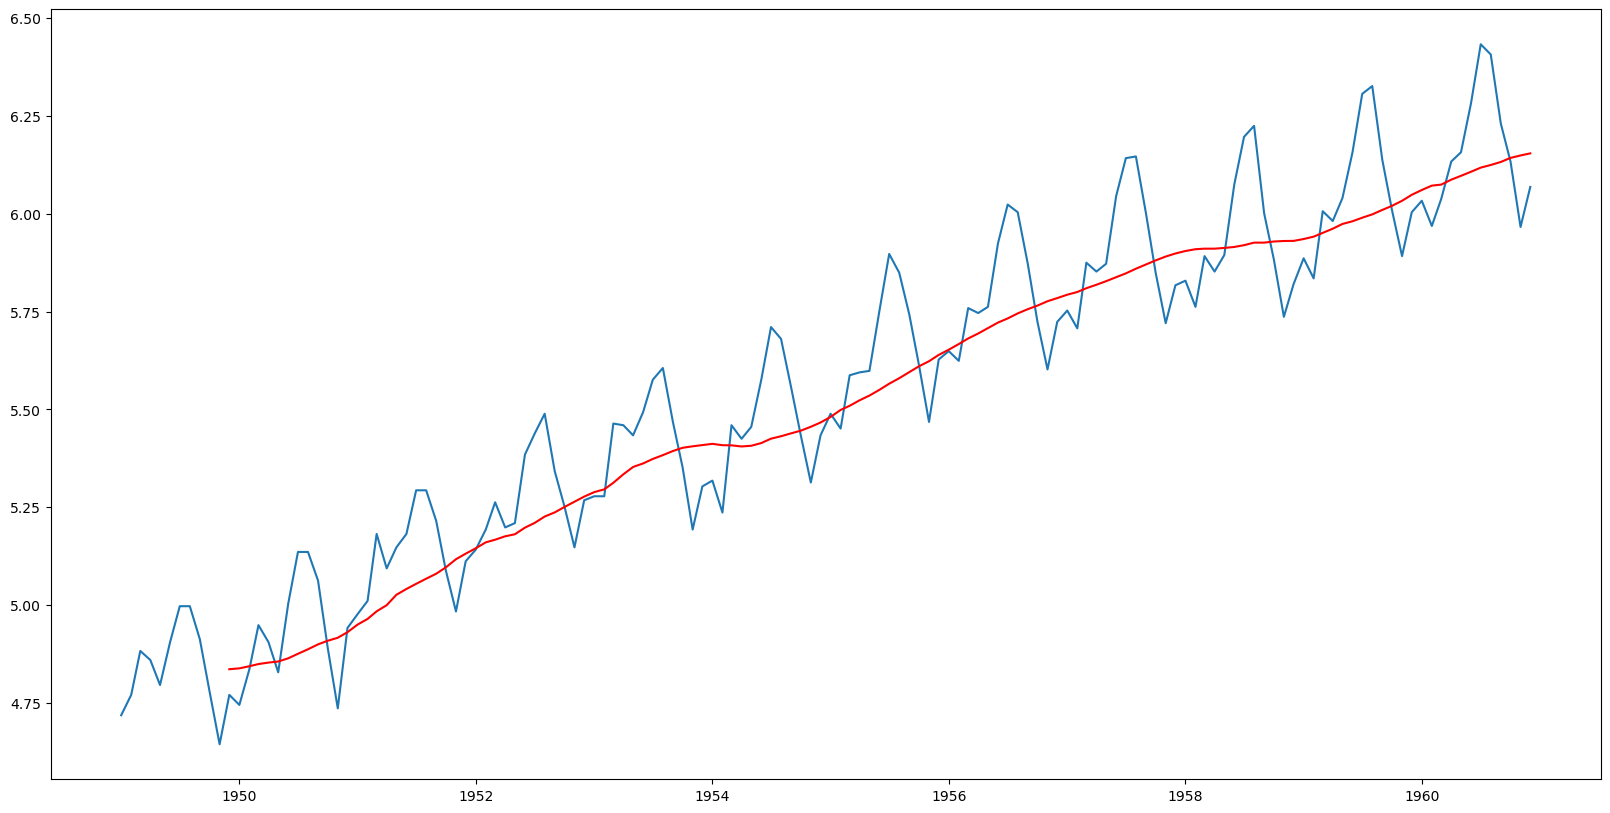

In [17]:
plt.figure(figsize=(20,10))
moving_average = data_log.rolling(window=12).mean()
moving_std = data_log.rolling(window=12).std()
plt.plot(data_log)
plt.plot(moving_average, color='red')

Using another method differencing, to make our time series stationary


In [19]:
diff = data_log - moving_average
diff.head(12)

,Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [20]:
diff.dropna(inplace=True)
diff.head()

,Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142


Defining function for Rolling Mean and Standard Deviation & ADF test


In [22]:
def test_stationarity(timeseries):
    moving_average = timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries,color = 'blue', label = 'Original')
    mean = plt.plot(moving_average, color = 'red', label = 'Moving Mean')
    std = plt.plot(moving_std, color = 'green', label = 'Moving SD')
    plt.legend(loc = 'best')
    plt.title('Rolling mean and standard deviation')
    plt.show()

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

Checking the stationarity of differenced data

From Rolling method, we see that Mean and standard deviation is not varying.

From ADF, we reject the null hypothesis bcoz p-value is less than 0.05 (significance leve

)
Applying all the transformation and methods, our differenced data is now stationary 

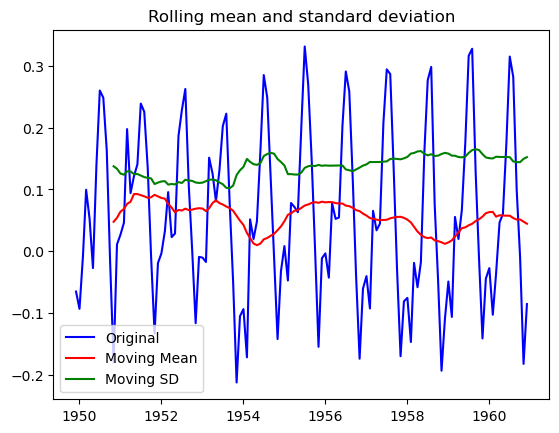

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [24]:
test_stationarity(diff)

Checking for Trend stationarity and performing exponential transformation on our data


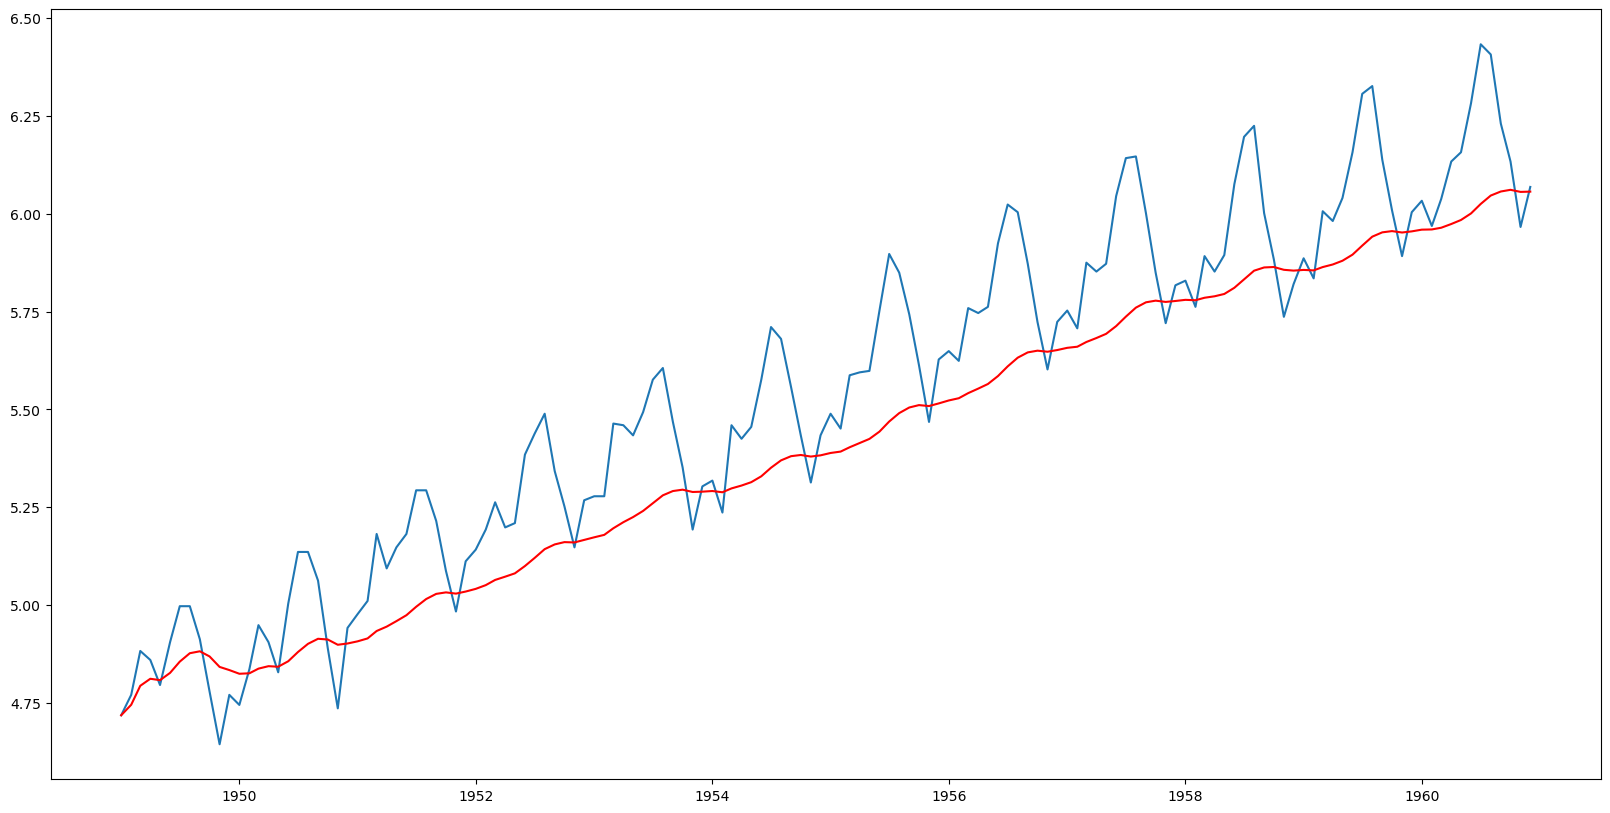

In [26]:
plt.figure(figsize=(20,10))
weighted_average = data_log.ewm(halflife=12, min_periods=0, adjust = True).mean()
plt.plot(data_log)
plt.plot(weighted_average, color='red')

Since log transformation is non-stationary, applying differencing on our data.

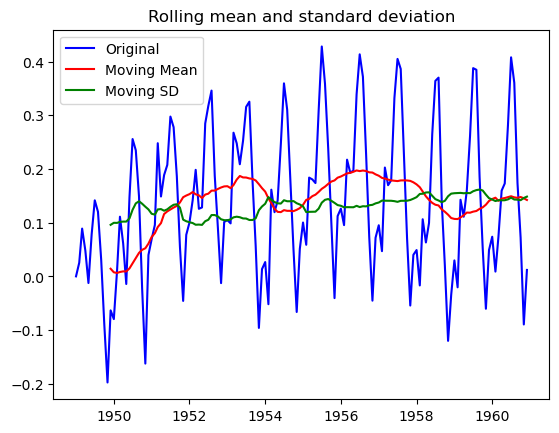

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [28]:
diff_weighted_average = data_log - weighted_average
test_stationarity(diff_weighted_average)

From above graph and ADF test, we conclude, it is trend stationary


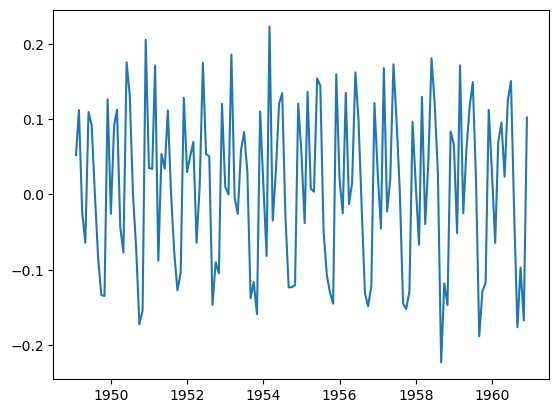

In [30]:
dfshift = data_log-data_log.shift()
plt.plot(dfshift)

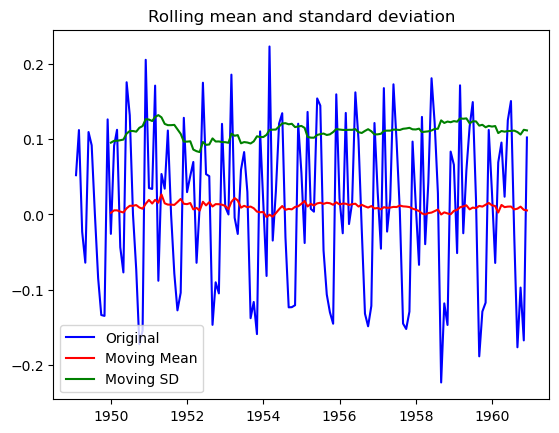

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [31]:
dfshift.dropna(inplace=True)
test_stationarity(dfshift)

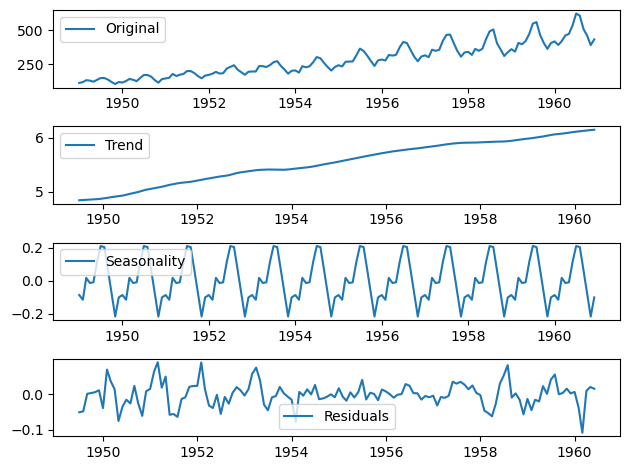

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(data_log)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

plt.subplot(411)
plt.plot(df, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [33]:
def stationarity(timeseries):
    moving_average = timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()
    
    orig = plt.plot(timeseries,color = 'blue', label = 'Original')
    mean = plt.plot(moving_average, color = 'red', label = 'Moving Mean')
    std = plt.plot(moving_std, color = 'green', label = 'Moving SD')
    plt.legend(loc = 'best')
    plt.title('Rolling mean and standard deviation')
    plt.show()

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

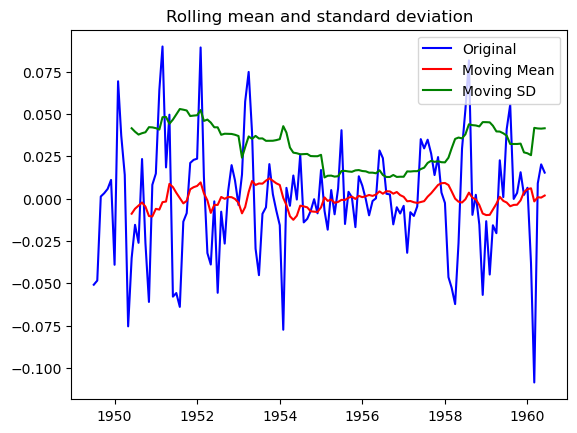

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [34]:
decomp_data=residual
decomp_data=decomp_data.dropna()
stationarity(decomp_data)

Plotting the ACF and PACF to find q and p value

We got q and p both 2 from the graph

Text(0.5, 1.0, 'Partial Autocorrelation Function')

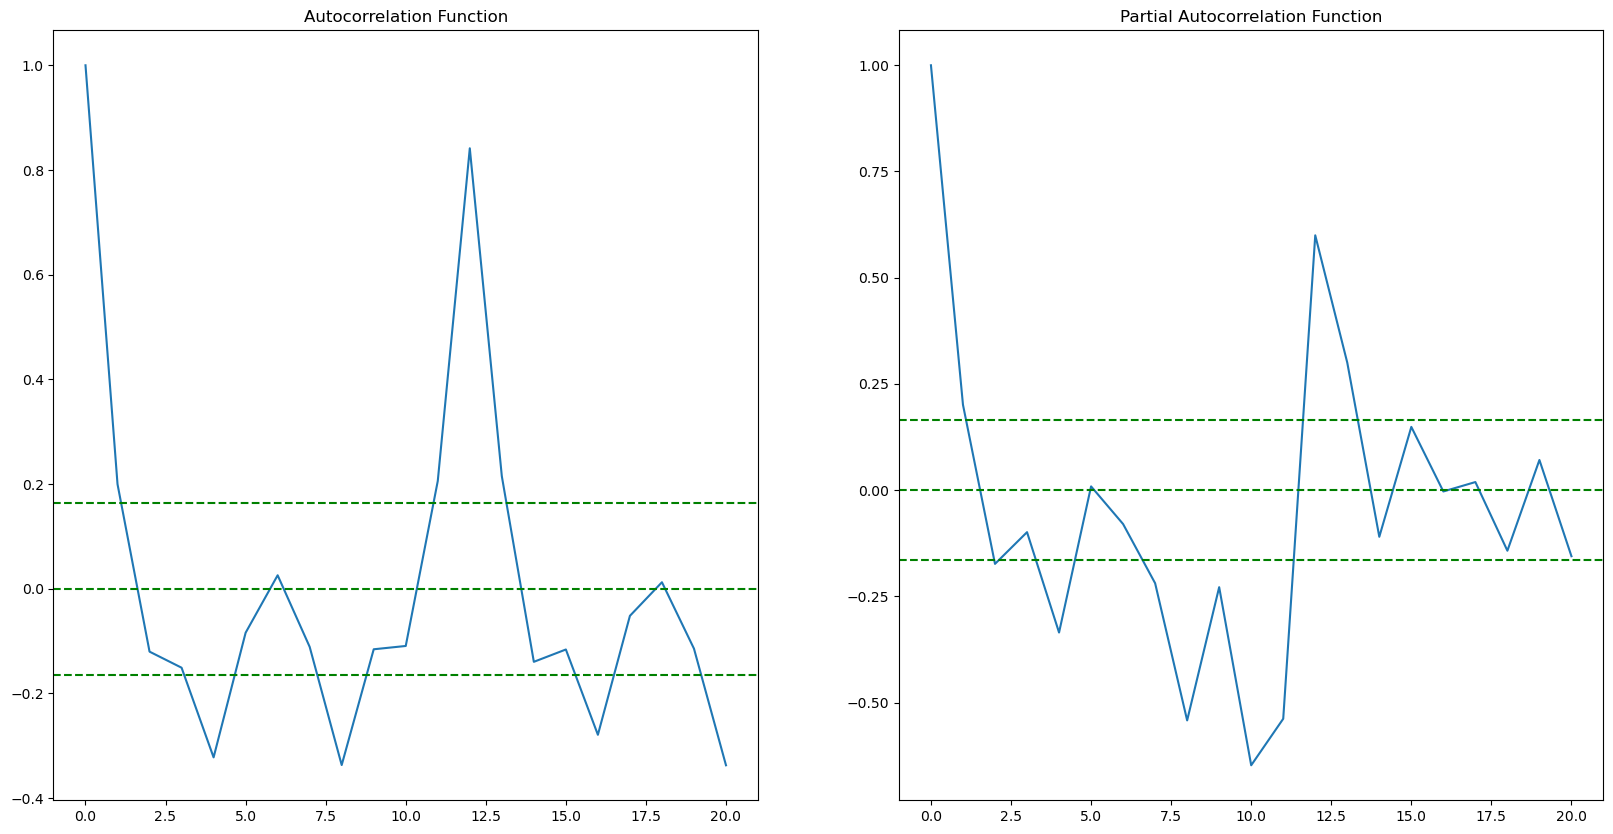

In [36]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf=acf(dfshift, nlags=20)
lag_pacf=pacf(dfshift, nlags=20, method='ols')

plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dfshift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dfshift)),linestyle='--',color='green')
plt.title('Autocorrelation Function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='green')
plt.axhline(y=-1.96/np.sqrt(len(dfshift)),linestyle='--',color='green')
plt.axhline(y=1.96/np.sqrt(len(dfshift)),linestyle='--',color='green')
plt.title('Partial Autocorrelation Function')

In [37]:
import itertools
import warnings
warnings.filterwarnings("ignore")  # To ignore ARIMA warnings during grid search

# Define the p, d, q ranges
p = range(0, 7)  # Adjust range as needed
d = range(0, 7)
q = range(0, 7)

# Generate all different combinations of p, d, q
pdq = list(itertools.product(p, d, q))

best_aic = np.inf  # Start with a large AIC value
best_order = None

# Grid search over p, d, q combinations
for order in pdq:
    try:
        model = ARIMA(dfshift, order=order)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = order
    except:
        continue

print(f'Best ARIMA order: {best_order} with AIC: {best_aic}')

Best ARIMA order: None with AIC: inf


Plotting ARIMA model


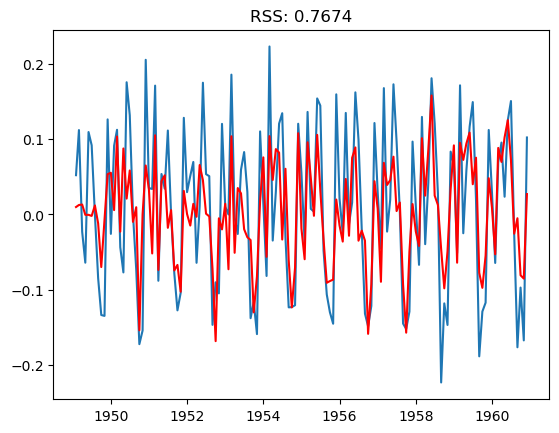

In [38]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(dfshift, order=(4,0,6))
results_ARIMA = model.fit()
plt.plot(dfshift, label='Original Differenced Series')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - dfshift['Passengers'])**2))
print('Plotting ARIMA model')

In [39]:
predictions=pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions.head())

Month
1949-02-01    0.009903
1949-03-01    0.012605
1949-04-01    0.013180
1949-05-01   -0.000460
1949-06-01   -0.000471
dtype: float64


In [40]:
predictions_cum_sum = predictions.cumsum()
print(predictions_cum_sum.head())

Month
1949-02-01    0.009903
1949-03-01    0.022508
1949-04-01    0.035688
1949-05-01    0.035228
1949-06-01    0.034757
dtype: float64


In [41]:
predictions_ARIMA_log = pd.Series(data_log['Passengers'].iloc[0], index=data_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_cum_sum, fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728402
1949-03-01    4.741007
1949-04-01    4.754187
1949-05-01    4.753727
dtype: float64

In [42]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
predictions_ARIMA.index = df.index
predictions_ARIMA.index.freq = 'MS'

In [43]:
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  143
Model:                 ARIMA(4, 0, 6)   Log Likelihood                 170.624
Date:                Thu, 19 Sep 2024   AIC                           -317.248
Time:                        14:09:00   BIC                           -281.694
Sample:                    02-01-1949   HQIC                          -302.800
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.001     14.393      0.000       0.009       0.011
ar.L1          1.2232      0.083     14.765      0.000       1.061       1.386
ar.L2         -0.6759      0.127     -5.316      0.0

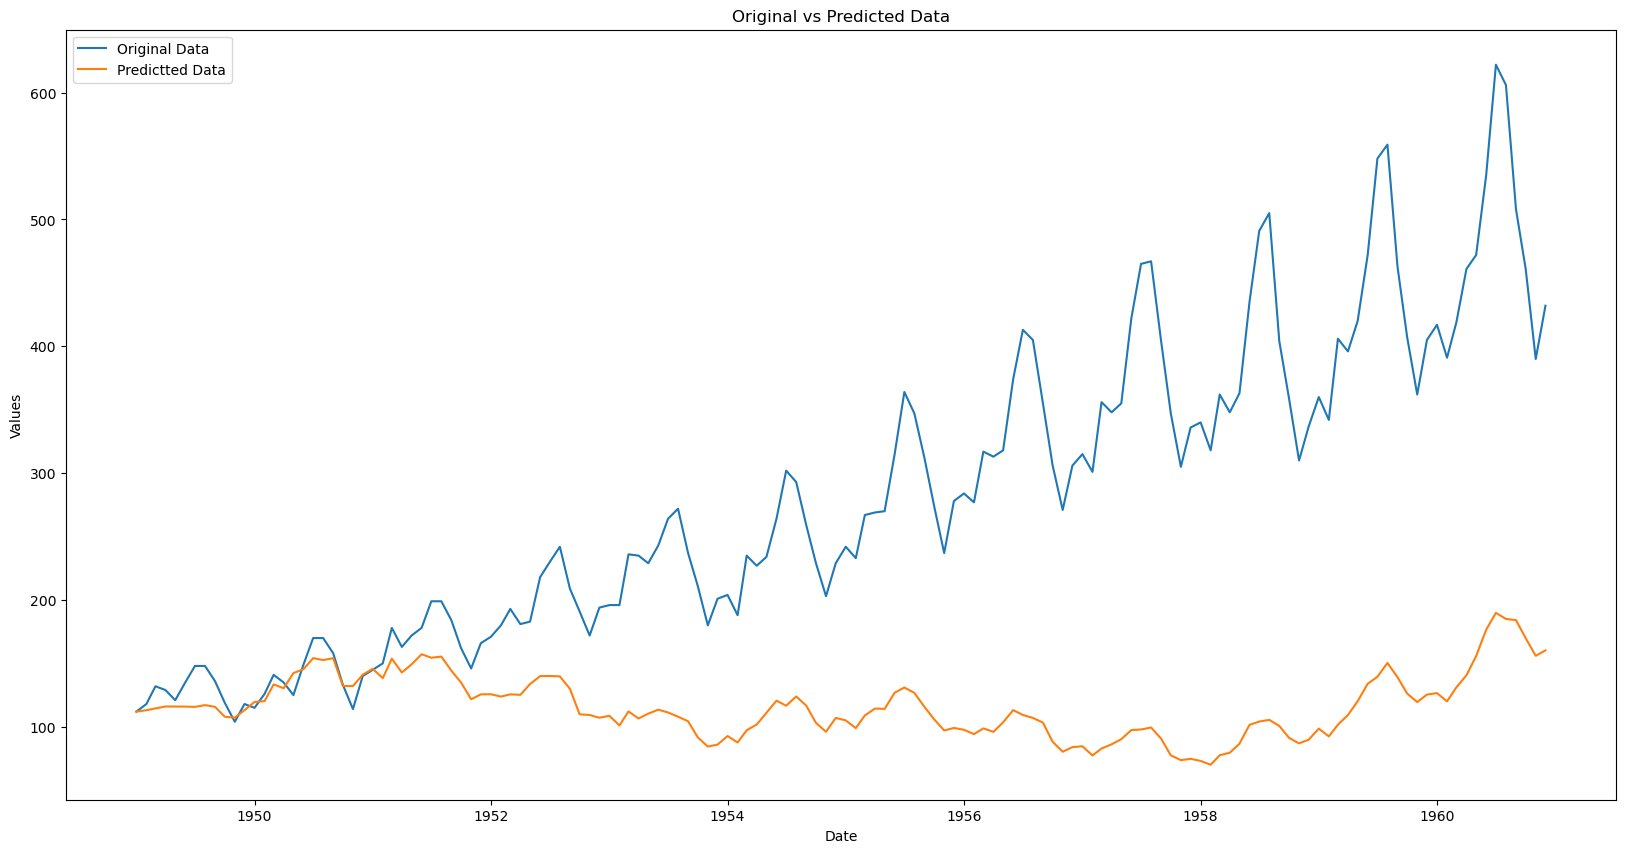

In [44]:
plt.figure(figsize=(20,10))
plt.plot(df,label='Original Data')
plt.plot(predictions_ARIMA, label='Predictted Data')
plt.title('Original vs Predicted Data')
plt.xlabel('Date')
plt.ylabel('Values')

# Add a legend to differentiate between original and predicted data
plt.legend()

plt.show()

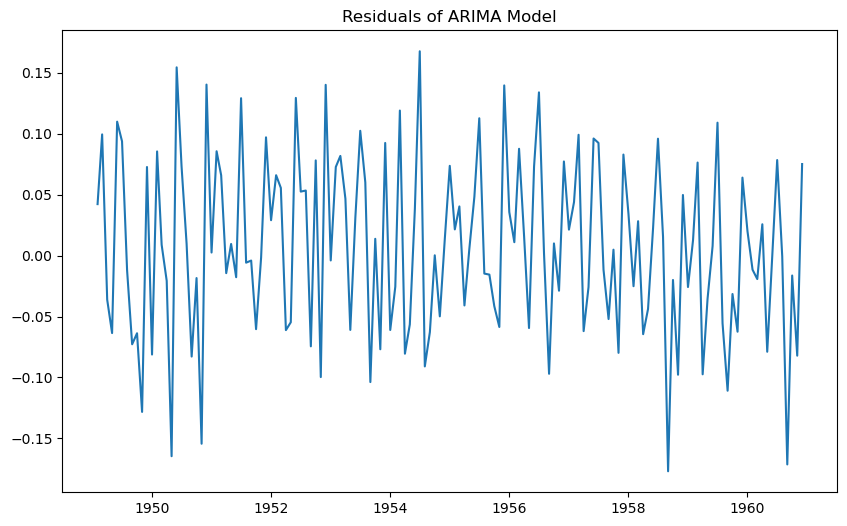

In [45]:
residuals = results_ARIMA.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residuals of ARIMA Model")
plt.show()

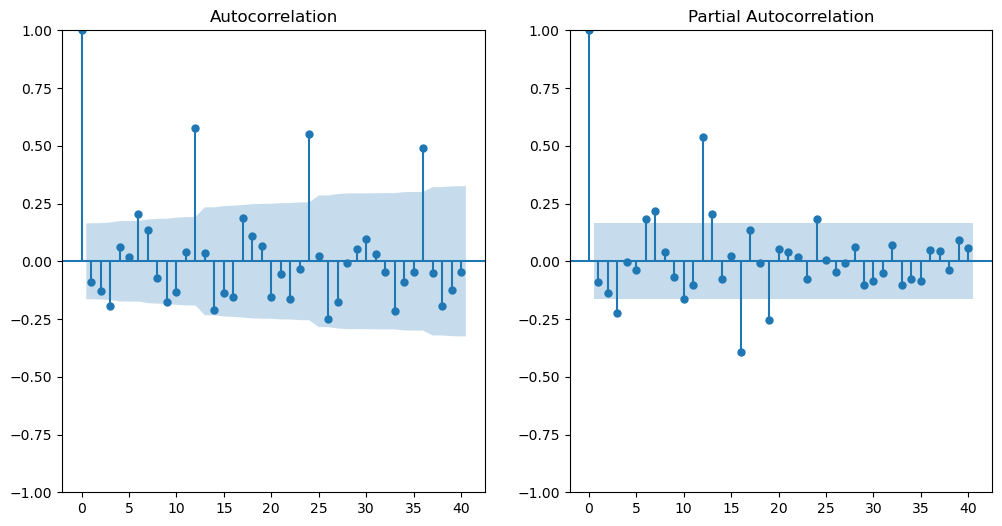

In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(residuals, lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.show()

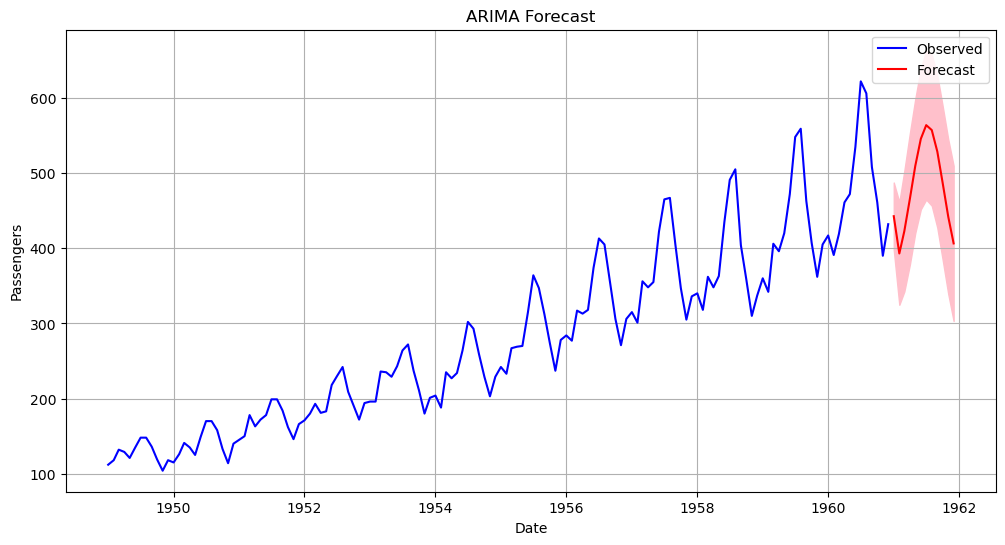

In [47]:
p, d, q = 4, 1, 6

model = ARIMA(df['Passengers'], order=(p, d, q))
results = model.fit()
forecast_steps = 12 
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=1)

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('ARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

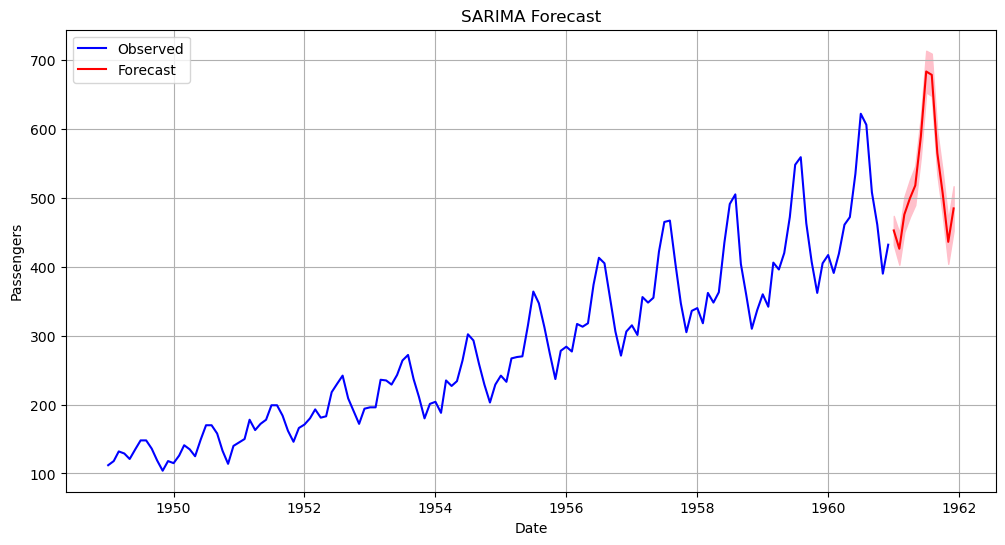

In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

p, d, q = 2, 0, 1
P, D, Q, S = 2, 0, 1, 12  # Seasonal order with a monthly seasonality
model = SARIMAX(df['Passengers'], order=(p, d, q), seasonal_order=(P, D, Q, S),enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(maxiter=1000)

df.index = pd.to_datetime(df.index)
df = df.asfreq('MS') 

forecast_steps = 12 
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Observed', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=1)

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('SARIMA Forecast')
plt.legend()
plt.grid(True)
plt.show()

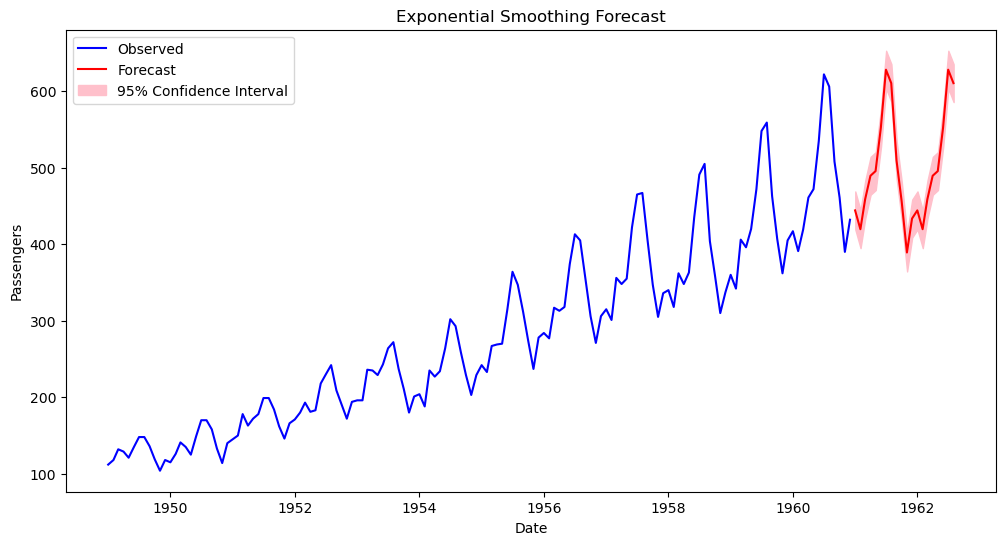

In [95]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df['Passengers'], seasonal='add', seasonal_periods=12)
result = model.fit()
forecast_steps = 20  
forecast = result.forecast(steps=forecast_steps)
alpha = 0.05
forecast_mean = forecast

forecast_std = result.resid.std()  # Standard deviation of residuals
z_score = 1.96  # For 95% confidence interval (2.5% each side of the normal distribution)

# Calculate confidence intervals
lower_ci = forecast_mean - z_score * forecast_std
upper_ci = forecast_mean + z_score * forecast_std

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], label='Observed', color='blue')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps, freq='M'), forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast.index, lower_ci, upper_ci, color='pink', alpha=1, label='95% Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Exponential Smoothing Forecast')
plt.legend()
plt.show()